In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /My-Projects/Processed_stocks.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symbol                  250 non-null    object 
 1   series                  250 non-null    object 
 2   date                    250 non-null    object 
 3   prev_close              250 non-null    float64
 4   open_price              250 non-null    float64
 5   high_price              250 non-null    float64
 6   low_price               250 non-null    float64
 7   last_price              250 non-null    float64
 8   close_price             250 non-null    float64
 9   average_price           250 non-null    float64
 10  total_traded_quantity   250 non-null    object 
 11  turnover_INR            250 non-null    object 
 12  no._of_trades           250 non-null    object 
 13  deliverable_qty         250 non-null    object 
 14  %_dly_qt_to_traded_qty  250 non-null    ob

In [3]:
data.columns
data['Future_price'] = data['close_price'].shift(-1)

In [4]:
features = ["prev_close","open_price","high_price","low_price","last_price","close_price","average_price", 'MA_10', 'MA_50', 'Daily_Volatility', 'Turn_over_ratio', 'RSI', 'MA_20','STD_20', 'Upper_band', 'lower_band']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])
Y = data["Future_price"]
X = pd.DataFrame(scaled_features,columns=features)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)


In [5]:
imputer = SimpleImputer(strategy="mean")
train_x = imputer.fit_transform(train_x)
test_x = imputer.fit_transform(test_x)
train_x = pd.DataFrame(train_x,columns=features)
test_x = pd.DataFrame(test_x,columns=features)

In [6]:
# Reset indices for both train_x and train_y
train_x = train_x.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)

# Filter out NaN values in train_y and align train_x
valid_mask = train_y.notna()
train_x = train_x[valid_mask]
train_y = train_y[valid_mask]
valid_mask_test = test_y.notna()
test_x = test_x[valid_mask_test]
test_y = test_y[valid_mask_test]

print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}")

train_x shape: (199, 16)
train_y shape: (199,)


In [10]:
dtrain = xgb.DMatrix(data=train_x, label=train_y)
dttest = xgb.DMatrix(data=test_x)

params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 6,
    "n_estimators": 500,
}

model = xgb.train(params, dtrain, num_boost_round=500)
preds = model.predict(dttest)
print("error in data : ",mean_absolute_error(test_y,preds))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


error in data :  1.593710003662109


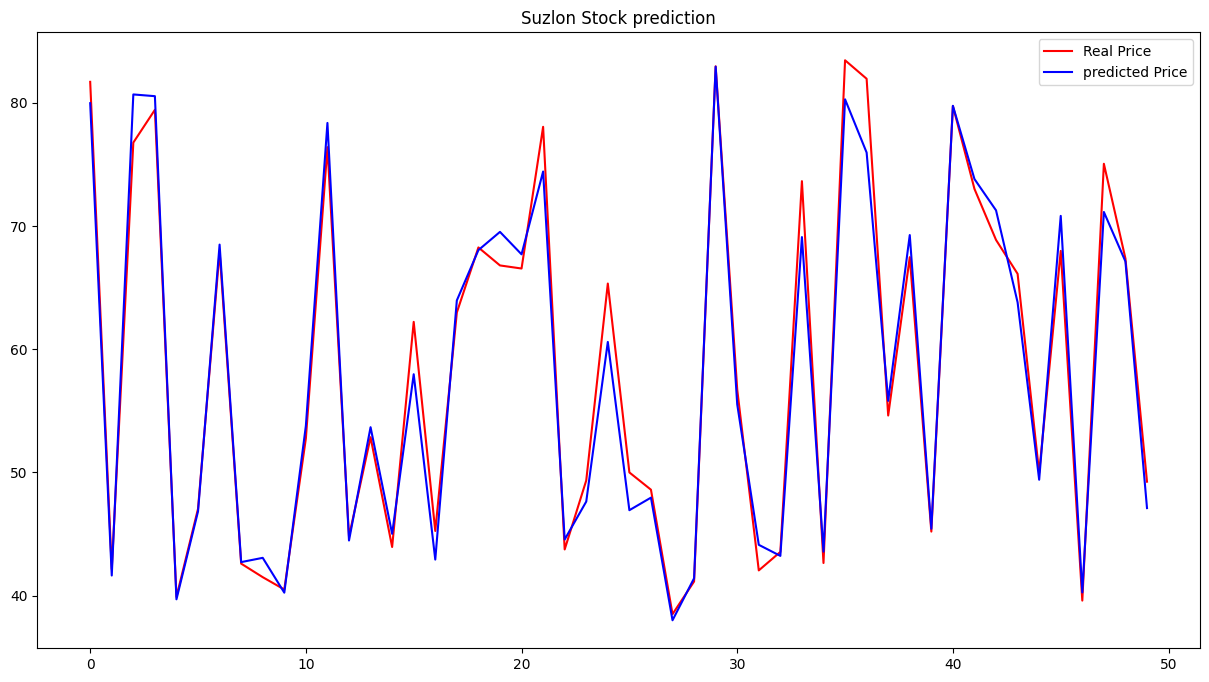

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title("Suzlon Stock prediction")
plt.plot(test_y,label="Real Price",color="red")
plt.plot(preds,label="predicted Price",color="blue")
plt.legend()
plt.show()

In [9]:
today_features = {
    'prev_close' : 64.13,
    'open_price' : 65.16,
    'high_price' : 65.16,
    'low_price' : 63.86,
    'last_price':63.70,
    'close_price':63.86,
    'average_price' :64.13 ,
    'MA_10' : 66.69 ,
    'MA_50' : 66.84,
    'Daily_Volatility' : 3.84,
    'Turn_over_ratio' : 20916.71422421613,
    'RSI' : 43.55152300712894,
    'MA_20':65.9985,
    'STD_20' : 1.8208334557786272,
    'Upper_band' : 69.64016691155726,
    'lower_band' : 62.356833088442755
}
import xgboost as xgb

today_df = pd.DataFrame([today_features])
today_df = today_df[features]
today_scaled = scaler.transform(today_df)
today_scaled_df = pd.DataFrame(today_scaled, columns=features)
dt_today = xgb.DMatrix(data=today_scaled_df)

today_prediction = model.predict(dt_today)
print(f"Predicted Stock Value for Today: {today_prediction[0]}")

Predicted Stock Value for Today: 63.9297981262207
